In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
iris = load_iris()

In [11]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.drop(['sepal length (cm)', 'sepal width (cm)'],axis='columns',inplace=True)

In [6]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [7]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [8]:
yp = km.fit_predict(df)
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
df["predicted_cluster"]= yp
df.head()

,petal length (cm),petal width (cm),predicted_cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [13]:
df1=df[df.predicted_cluster==0]
df2=df[df.predicted_cluster==1]
df3=df[df.predicted_cluster==2]

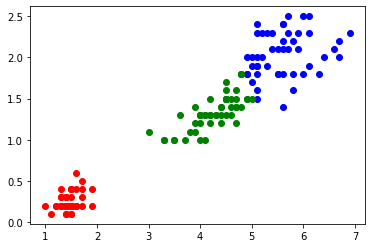

In [14]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color = 'green')

In [15]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

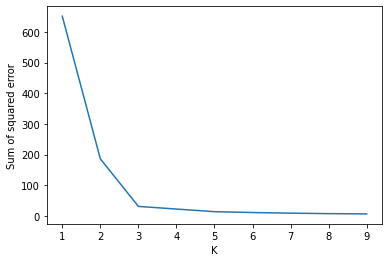

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [19]:
df["real clusters"] = iris.target
df.head(200)

,petal length (cm),petal width (cm),predicted_cluster,real clusters
0,1.4,0.2,1,0
1,1.4,0.2,1,0
2,1.3,0.2,1,0
3,1.5,0.2,1,0
4,1.4,0.2,1,0
...,...,...,...,...
145,5.2,2.3,0,2
146,5.0,1.9,0,2
147,5.2,2.0,0,2
148,5.4,2.3,0,2


In [23]:
def rename(x):
    if x==1:
        return 'setosa'
    elif x==2:
        return 'versicolor'
    else:
        return 'virginica'
    

In [24]:
df['classification name']= df.apply(lambda row : rename(row['predicted_cluster']), axis = 1)
df.head(150)

,petal length (cm),petal width (cm),predicted_cluster,real clusters,classification name
0,1.4,0.2,1,0,setosa
1,1.4,0.2,1,0,setosa
2,1.3,0.2,1,0,setosa
3,1.5,0.2,1,0,setosa
4,1.4,0.2,1,0,setosa
...,...,...,...,...,...
145,5.2,2.3,0,2,virginica
146,5.0,1.9,0,2,virginica
147,5.2,2.0,0,2,virginica
148,5.4,2.3,0,2,virginica
